In [1]:
import os
import numpy as np  # type: ignore
import zipfile
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set() # type: ignore
import matplotlib.pyplot as plt # type: ignore

def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data", r'C:\Users\Maria Silvia\Downloads\rawdata.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as zipf:
        zipf.extractall(dest_path)

download_files()


In [2]:
#importar los datos de test del total de los datos

import os
import shutil


# Directorio de imágenes
d_name = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
output_dir = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Lista de imágenes de prueba
test_faces = '4831,3228,4469,1927,1329,5109,2922,2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,2747,3695,2575,4682,2111,1794,5106,2323'

# Convertir la lista a un conjunto de enteros
test_faces_set = set(map(int, test_faces.split(',')))

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name):

        if int(nfile) in test_faces_set:
            src = os.path.join(d_name, nfile)
            dst = os.path.join(output_dir, nfile)
            try:
                shutil.move(src, dst)
                print(f'Movido: {src} -> {dst}')
            except FileNotFoundError:
                print(f'Archivo no encontrado: {src}')
            except Exception as e:
                print(f'Error al mover {src}: {e}')


In [3]:
import os
import random
from PIL import Image # type: ignore

# Directorio de imágenes
d_name_test = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'
d_name_train = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
image_size = (128, 128) 
sample = 1

X_train = []
X_test = []

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_train):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_train,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_train.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_train = np.array(X_train)
print(X_train.shape)

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_test):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_test,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_test.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_test = np.array(X_test)
print(X_test.shape)


(3693, 16384)
(300, 16384)


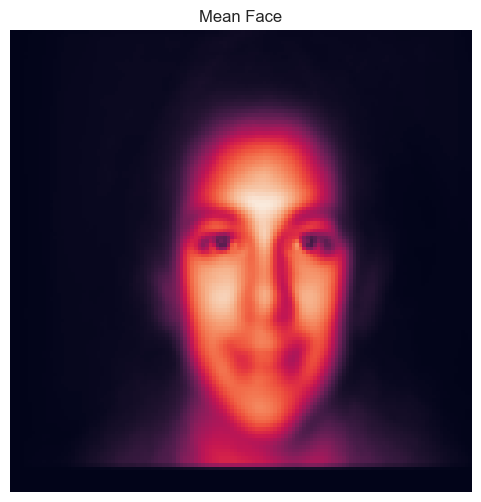

In [4]:
# Verificar quesi hayan imagenes para seguir la busqyeda
if X_test.shape[0] == 0:
    raise ValueError("No se cargaron imágenes.")

# Paso 1: Sumar todos los vectores de imágenes
sum_vector = np.sum(X_test, axis=0)

# Paso 2: Promediar los vectores
mean_vector = sum_vector / X_test.shape[0]

# Paso 3: Convertir el vector promedio a una imagen 2D(128,128)
mean_image = mean_vector.reshape(image_size)

plt.figure(figsize=(6, 6))
plt.imshow(mean_image)
plt.title("Mean Face")
plt.axis('off')
plt.show()

(3693, 16384)
(300, 16384)


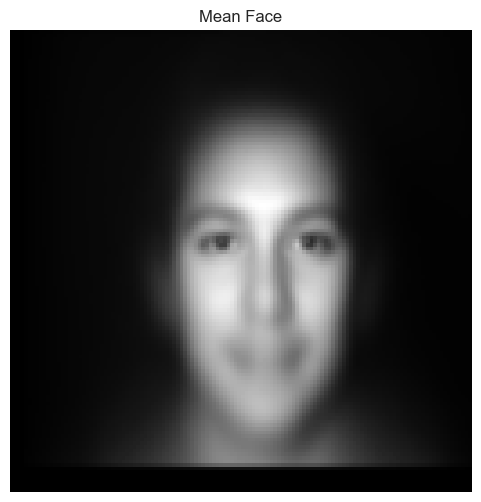

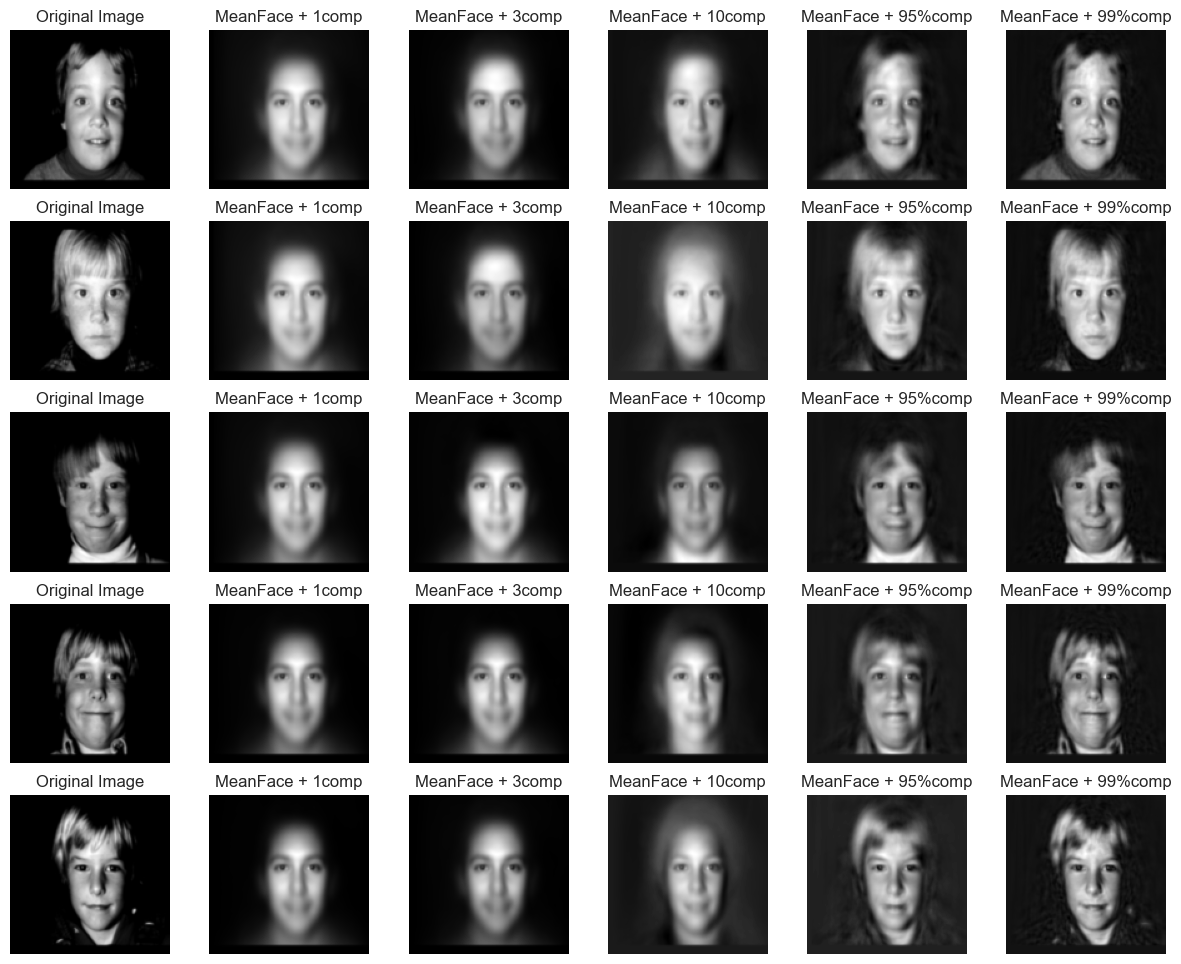

El archivo se ha guardado correctamente en C:\Users\Maria Silvia\kagle\test_data_pca_component_1.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import random
from PIL import Image # type: ignore

# Supongamos que X_train es tu matriz de datos de entrenamiento (300, 16384)
# y X_test es la matriz de datos de prueba
# Directorio de imágenes
d_name_test = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'
d_name_train = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
image_size = (128, 128) 
sample = 1

X_train = []
X_test = []

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_train):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_train,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_train.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_train = np.array(X_train)
print(X_train.shape)

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_test):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_test,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_test.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_test = np.array(X_test)
print(X_test.shape)


# Paso 1: Calcular la Mean Face y visualizarla
mean_face = np.mean(X_train, axis=0)

def plot_image(image_vector, title, subplot):
    plt.subplot(subplot)
    plt.imshow(image_vector.reshape(image_size), cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(6, 6))
plot_image(mean_face, 'Mean Face', 111)
plt.show()

# Paso 2: Centrar los datos
centered_data = X_train - mean_face

# Paso 3: Aplicar PCA
pca = PCA()
pca.fit(centered_data)

# Componentes que explican el 95% de la varianza
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Componentes que explican el 99% de la varianza
num_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

# Reconstrucción utilizando PCA
def pca_reconstruction(X, mean_face, pca, num_components):
    reduced_data = pca.transform(X - mean_face)[:, :num_components]
    reconstructed_data = pca.inverse_transform(np.hstack([reduced_data, np.zeros((reduced_data.shape[0], pca.n_components_ - num_components))])) + mean_face
    return reconstructed_data

# Reconstruir los datos con diferentes números de componentes
reconstructed_1comp = pca_reconstruction(X_train, mean_face, pca, 1)
reconstructed_3comp = pca_reconstruction(X_train, mean_face, pca, 3)
reconstructed_10comp = pca_reconstruction(X_train, mean_face, pca, 10)
reconstructed_95comp = pca_reconstruction(X_train, mean_face, pca, num_components_95)
reconstructed_99comp = pca_reconstruction(X_train, mean_face, pca, num_components_99)

# Paso 4: Visualizar las primeras 5 imágenes
def plot_images(original, reconstructed, titles):
    num_images = len(original)
    num_titles = len(titles)
    plt.figure(figsize=(15, 12))
    
    for i in range(num_images):
        plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + 1)
        plt.imshow(original[i].reshape(image_size), cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        
        for j, title in enumerate(titles):
            plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + j + 2)
            plt.imshow(reconstructed[title][i].reshape(image_size), cmap='gray')
            plt.title(f'MeanFace + {title}')
            plt.axis('off')
    
    plt.show()


# Definir el tamaño de la imagen (suponiendo que es (128, 128))
image_size = (128, 128)

# Preparar imágenes para visualización
reconstructed = {
    '1comp': reconstructed_1comp,
    '3comp': reconstructed_3comp,
    '10comp': reconstructed_10comp,
    '95%comp': reconstructed_95comp,
    '99%comp': reconstructed_99comp
}

# Visualizar resultados
plot_images(
    original=X_train[:5],  # Primeras 5 imágenes originales
    reconstructed=reconstructed,
    titles=['1comp', '3comp', '10comp', '95%comp', '99%comp']
)

# Paso 5: Aplicar PCA a los datos de prueba
pca_test = PCA(n_components=1)
pca_test.fit(centered_data)  # Ajustar con datos de entrenamiento
transformed_test_data = pca_test.transform(X_test - mean_face)

# Guardar los resultados para Kaggle
file_path = 'C:\\Users\\Maria Silvia\\kagle\\test_data_pca_component_1.csv'

# Guardar los datos en el archivo
np.savetxt(file_path,transformed_test_data, delimiter=',')

# Verificar si el archivo se ha guardado correctamente
if os.path.isfile(file_path):
    print(f'El archivo se ha guardado correctamente en {file_path}')
else:
    print(f'Error al guardar el archivo en {file_path}')

In [9]:
import numpy as np
import os
import random
from PIL import Image # type: ignore
from sklearn.decomposition import PCA
import pandas as pd

# Directorio de imágenes
d_name_test = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'
d_name_train = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
image_size = (128, 128) 
sample = 1

X_train = []
X_test = []
test_ids = []  # Lista para almacenar los nombres de archivo de prueba (IDs)

# Cargar datos de entrenamiento
for nfile in os.listdir(d_name_train):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_train, nfile), "rb").read()
        img = Image.frombytes('L', image_size, bytes_read)
        X_train.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_train = np.array(X_train)
print(f"X_train shape: {X_train.shape}")

# Cargar datos de prueba y almacenar los nombres de archivo como IDs
for nfile in os.listdir(d_name_test):
    if random.random() <= sample:
        test_ids.append(nfile)  # Almacenar el nombre del archivo (ID)
        bytes_read = open(os.path.join(d_name_test, nfile), "rb").read()
        img = Image.frombytes('L', image_size, bytes_read)
        X_test.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_test = np.array(X_test)
print(f"X_test shape: {X_test.shape}")

# Paso 1: Calcular la Mean Face del conjunto de entrenamiento
mean_face = np.mean(X_train, axis=0)

# Paso 2: Centrar los datos de entrenamiento
centered_data = X_train - mean_face

# Paso 3: Aplicar PCA a los datos de entrenamiento
pca = PCA()
pca.fit(centered_data)

# Paso 4: Transformar los datos de prueba usando la misma transformación PCA
transformed_test_data = pca.transform(X_test - mean_face)

# Solo necesitamos la primera componente principal
first_component_test_data = transformed_test_data[:, 0]

# Paso 5: Crear un DataFrame con las columnas 'ID' y 'label'
# Usar los nombres de los archivos como 'ID' y los resultados de la primera componente como 'label'
submission_df = pd.DataFrame({
    'ID': test_ids,
    'label': first_component_test_data
})

# Guardar el DataFrame en un archivo CSV con el formato adecuado para Kaggle
file_path = r'C:\Users\Maria Silvia\kagle\submission_pca.csv'
submission_df.to_csv(file_path, index=False)

# Verificar si el archivo se ha guardado correctamente
if os.path.isfile(file_path):
    print(f'El archivo de submission se ha guardado correctamente en {file_path}')
else:
    print(f'Error al guardar el archivo en {file_path}')


X_train shape: (3693, 16384)
X_test shape: (300, 16384)


MemoryError: Unable to allocate 104. MiB for an array with shape (3693, 3693) and data type float64

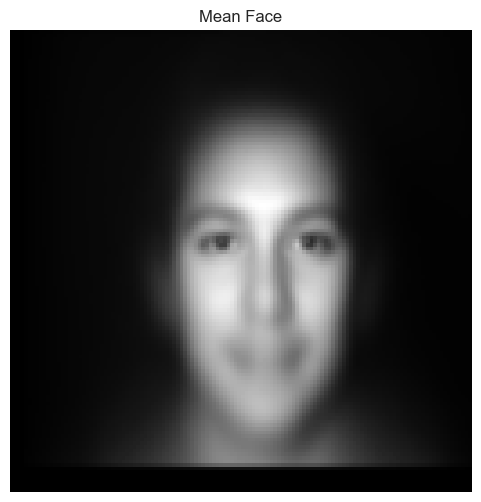

MemoryError: Unable to allocate 2.00 GiB for an array with shape (16384, 16384) and data type float64

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que X_train es tu matriz de datos de entrenamiento con tamaño (300, 16384)
# y X_test es la matriz de datos de prueba.

# Paso 1: Calcular la Mean Face y visualizarla
def calculate_mean_face(X):
    return np.mean(X, axis=0)

def plot_image(image_vector, title, subplot):
    plt.subplot(subplot)
    plt.imshow(image_vector.reshape(image_size), cmap='gray')
    plt.title(title)
    plt.axis('off')

# Definir el tamaño de la imagen (suponiendo que es (128, 128))
image_size = (128, 128)

# Calcular el Mean Face
mean_face = calculate_mean_face(X_train)

# Visualizar la Mean Face
plt.figure(figsize=(6, 6))
plot_image(mean_face, 'Mean Face', 111)
plt.show()

# Paso 2: Centrar los datos
def center_data(X, mean_face):
    return X - mean_face

centered_data = center_data(X_train, mean_face)

# Paso 3: Implementar PCA manualmente
def compute_covariance_matrix(X):
    return np.cov(X, rowvar=False)

def compute_eigenfaces(cov_matrix, num_components):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Ordenar los eigenvalores y eigenvectores en orden descendente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    # Seleccionar el número deseado de componentes principales
    return eigenvectors[:, :num_components]

def pca_transform(X, eigenvectors):
    return np.dot(X, eigenvectors)

def pca_inverse_transform(X_reduced, eigenvectors):
    return np.dot(X_reduced, eigenvectors.T)

# Calcular la matriz de covarianza
cov_matrix = compute_covariance_matrix(centered_data)

# Determinar el número de componentes que explican el 95% y 99% de la varianza
def determine_num_components(eigenvalues, variance_threshold):
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    return np.argmax(cumulative_variance >= variance_threshold) + 1

# Calcular el número de componentes para el 95% y 99% de la varianza
num_components_95 = determine_num_components(np.sort(np.linalg.eigvals(cov_matrix))[::-1], 0.95)
num_components_99 = determine_num_components(np.sort(np.linalg.eigvals(cov_matrix))[::-1], 0.99)

# Obtener los eigenvectores para diferentes números de componentes
eigenvectors_1 = compute_eigenfaces(cov_matrix, 1)
eigenvectors_3 = compute_eigenfaces(cov_matrix, 3)
eigenvectors_10 = compute_eigenfaces(cov_matrix, 10)
eigenvectors_95 = compute_eigenfaces(cov_matrix, num_components_95)
eigenvectors_99 = compute_eigenfaces(cov_matrix, num_components_99)

# Reconstruir las imágenes
def pca_reconstruction(X, mean_face, eigenvectors):
    reduced_data = pca_transform(X - mean_face, eigenvectors)
    reconstructed_data = pca_inverse_transform(reduced_data, eigenvectors) + mean_face
    return reconstructed_data

# Reconstruir las imágenes con diferentes números de componentes
reconstructed_1comp = pca_reconstruction(X_train, mean_face, eigenvectors_1)
reconstructed_3comp = pca_reconstruction(X_train, mean_face, eigenvectors_3)
reconstructed_10comp = pca_reconstruction(X_train, mean_face, eigenvectors_10)
reconstructed_95comp = pca_reconstruction(X_train, mean_face, eigenvectors_95)
reconstructed_99comp = pca_reconstruction(X_train, mean_face, eigenvectors_99)

# Paso 4: Visualizar las primeras 5 imágenes
def plot_images(original, reconstructed, titles):
    num_images = len(original)
    num_titles = len(titles)
    plt.figure(figsize=(15, 12))
    
    for i in range(num_images):
        plt.subplot(num_images, num_titles, i * num_titles + 1)
        plt.imshow(original[i].reshape(image_size), cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        
        for j, title in enumerate(titles):
            plt.subplot(num_images, num_titles, i * num_titles + j + 2)
            plt.imshow(reconstructed[title][i].reshape(image_size), cmap='gray')
            plt.title(f'MeanFace + {title}')
            plt.axis('off')
    
    plt.show()

# Preparar imágenes para visualización
reconstructed = {
    '1comp': reconstructed_1comp,
    '3comp': reconstructed_3comp,
    '10comp': reconstructed_10comp,
    '95%comp': reconstructed_95comp,
    '99%comp': reconstructed_99comp
}

# Visualizar resultados
plot_images(
    original=X_train[:5],  # Primeras 5 imágenes originales
    reconstructed=reconstructed,
    titles=['1comp', '3comp', '10comp', '95%comp', '99%comp']
)

# Paso 5: Aplicar PCA a los datos de prueba (solo la primera componente)
def apply_pca_to_test(X_test, mean_face, eigenvectors):
    reduced_test_data = pca_transform(X_test - mean_face, eigenvectors)
    return reduced_test_data[:, :1]  # Solo primera componente

# Aplicar PCA a los datos de prueba con la primera componente
test_reduced_data = apply_pca_to_test(X_test, mean_face, eigenvectors_1)

# Guardar los resultados para Kaggle
np.savetxt('C:/Users/Maria Silvia/test_data_pca_component_1.csv', test_reduced_data, delimiter=',')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que X es tu matriz de datos con tamaño (300, 16384)
# y X_test es la matriz de datos de prueba

# Calcular el Mean Face
mean_face = np.mean(X, axis=0)

# Centrar los datos
centered_data = X - mean_face
centered_test_data = X - mean_face

# Configurar PCA para reducir la dimensionalidad
def pca_reconstruction(X, mean_face, n_components):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(centered_data)
    reconstructed_data = pca.inverse_transform(reduced_data) + mean_face
    return reconstructed_data

# Reconstruir los datos con diferentes números de componentes
reconstructed_1comp = pca_reconstruction(X, mean_face, 1)
reconstructed_3comp = pca_reconstruction(X, mean_face, 3)
reconstructed_10comp = pca_reconstruction(X, mean_face, 10)

# Componentes que explican el 95% de la varianza
pca_95 = PCA(n_components=0.95)
pca_95.fit(centered_data)
reconstructed_95comp = pca_95.inverse_transform(pca_95.transform(centered_data)) + mean_face

# Componentes que explican el 99% de la varianza
pca_99 = PCA(n_components=0.99)
pca_99.fit(centered_data)
reconstructed_99comp = pca_99.inverse_transform(pca_99.transform(centered_data)) + mean_face

# Visualizar las primeras 5 imágenes
def plot_images(images, titles):
    plt.figure(figsize=(12, 10))
    for i in range(5):
        plt.subplot(5, len(titles), i + 1)
        plt.imshow(X[i].reshape(image_size), cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        for j, (reconstructed_image, title) in enumerate(images):
            plt.subplot(5, len(titles), (i + 1) + (j + 1) * 5)
            plt.imshow(reconstructed_image[i].reshape(image_size), cmap='gray')
            plt.title(title)
            plt.axis('off')

    plt.show()

# Preparar imágenes para visualización
images = [
    (reconstructed_1comp, 'MeanFace + 1comp'),
    (reconstructed_3comp, 'MeanFace + 3comp'),
    (reconstructed_10comp, 'MeanFace + 10comp'),
    (reconstructed_95comp, 'MeanFace + 95%comp'),
    (reconstructed_99comp, 'MeanFace + 99%comp')
]

plot_images(images, ['Original Image', 'MeanFace + 1comp', 'MeanFace + 3comp', 'MeanFace + 10comp', 'MeanFace + 95%comp', 'MeanFace + 99%comp'])


In [ ]:

# Suponiendo que X es tu matriz de datos con forma (n_samples, n_features)
# X = np.array([...])  # Reemplaza esto con tus datos

# Centrar los datos
mean = np.mean(X, axis=0)
X_centered = X - mean

In [ ]:
# Suponiendo que X es tu matriz de datos (300, 16384)
#X = np.array(X, dtype=np.float64)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X, rowvar=False)

# Mostrar la matriz de covarianza
print("Matriz de Covarianza de tamaño:", cov_matrix.shape)


In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Ordenar los valores propios en orden descendente
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
# Calcular la varianza explicada acumulada
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Encontrar el número de componentes necesarios para mantener el 95% de la varianza
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f'Número de componentes para mantener el 95% de la varianza: {n_components}')


In [ ]:
# Sumar todos los valores propios
total_variance = np.sum(sorted_eigenvalues)

# Calcular la varianza acumulativa
cumulative_variance = np.cumsum(sorted_eigenvalues)

# Encontrar el número de componentes necesarios para alcanzar el 95%
required_components = np.argmax(cumulative_variance >= 0.95 * total_variance) + 1

print("Número de componentes necesarios para el 95% de la varianza:", required_components,sorted_eigenvalues)


In [ ]:
import numpy as np

# Supongamos que X es tu matriz de datos con tamaño (300, 16384)
# Calcular el Mean Face
mean_face = np.mean(X, axis=0)

# Centrar los datos
centered_data = X - mean_face

def pca_reconstruction(X, mean_face, eigenvectors, num_components):
    principal_components = eigenvectors[:, :num_components]
    print("X - mean_face shape:", X.shape)
    print("principal_components shape:", principal_components.shape)
    
    reduced_data = np.dot(X - mean_face, principal_components)
    print("reduced_data shape:", reduced_data.shape)
    
    reconstructed_data = np.dot(reduced_data, principal_components.T) + mean_face
    print("reconstructed_data shape:", reconstructed_data.shape)
    
    return reconstructed_data
reconstructed_1comp = pca_reconstruction(X, mean_face, eigenvectors, 1)


In [6]:
def plot_faces(original, mean_face, reconstructed, title):
    plt.figure(figsize=(15, 10))
    
    # Mostrar Mean Face
    plt.subplot(2, 6, 1)
    plt.imshow(mean_face.reshape(128, 128), cmap='gray')
    plt.title('Mean Face')
    plt.axis('off')
    
    for i in range(5):
        # Mostrar cara original
        plt.subplot(2, 6, i + 2)
        plt.imshow(original[i].reshape(128, 128), cmap='gray')
        plt.title(f'Original {i+1}')
        plt.axis('off')

        # Mostrar Mean Face + 1 componente
        plt.subplot(2, 6, 6 + i + 1)
        plt.imshow(reconstructed[i].reshape(128, 128), cmap='gray')
        plt.title(f'Reconstr. {i+1}')
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

plot_faces(X, mean_face, reconstructed_1comp, 'Mean Face + 1 Component')



NameError: name 'X' is not defined